# Regression_Proj_Chad_Hackney

Regression Module Project

24 Mar 19

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

### Data Dictionary & Details

**we will be using 2016 data so do NOT use properties_2017 or predictions_2017**  

Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)

##### See immediately below for definitions of the data fields used in this analysis. The complete data dictionary for all fields (to include those fields NOT used) is available upon request.

Define your fields.   You may be able to to some ahead of time, but you may need to return to this section after you have explored the data and understand more about what each field means.  Also, look for a data dictionary either in the database or in the original data source (kaggle.com).

Feature:  Description

bedroomcnt:  Number of bedrooms in home 

calculatedfinishedsquarefeet:  Calculated total finished living area of the home

landtaxvaluedollarcnt:  The assessed value of the land area of the parcel, combined with structuretaxvaluedollarcnt, makes up the taxvaluedollarcnt

logerror:  The difference between the sales price and the Zestimate

lotsizesquarefeet:  Area of the lot in square feet

parcelid:  Unique identifier for parcels (lots) 

pp_sqft:  A user-defined calculated field created by dividing taxvaluedollarcnt by calculatedfinishedsquarefeet

structuretaxvaluedollarcnt:  The assessed value of the built structure on the parcel

taxamount:  The total property tax assessed for that assessment year

taxvaluedollarcnt:  The total tax assessed value of the parcel, both landtaxvaluedollarcnt and structuretaxvaluedollarcnt

You are free to use more fields than is mentioned, but I would recommend not expanding it to too many fields in the beginning as it will add complexity and you want to make sure you get an initial version completed before diving in deeper.  

- logerror
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- fullbathcnt
- garagecarcnt
- roomcnt
- yearbuilt
- taxvaluedollarcnt
- taxamount

##### The required fields shown above *were* included in the initial trial of this analysis.  However, many of them were later swapped out for other fields in subsequent analysis.

### Initial Thoughts, Ideas, Hypotheses

Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.

#### Brainstorming ideas
The question asks, "What variables correlate to the Zestimate error?"

Big picture, the error is caused because of a mismatch between the Zestimate and the actual sales price.

This means the sales price is likely the cause of the error, because if the Zestimate and the sales price matched, there would not be an error.  I ponder what is causing that mismatch.  Is it something actually driving the price itself?


#### What drives home sales prices?

Historically, price-per-square-foot, taxes, and location have been among the biggest drivers in residential real estate.

While other categorical factors such as bed/bath counts are important, these factors mentioned above often hold more weight.

#### Hypotheses

I predict, the error is driven by a combination of sales price, square footage and/or taxes.

#### How variables might impact or relate to each other
Square footage and price often play hand in hand in real estate.

Also there is likely a valuation for the property and also one for the dwelling, and most likely a value that combines the two into an overall valuation or sales price.

Taxes are also likely correlated to square footage, as taxes are calculated on a square footage basis.

There may be a need to create an additional feature that calculates price-per-square foot.  That measure may be relevant to this problem.

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [2]:
# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# acquire/wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 

- Filter out any from predictions_2016 that do not have a logerror. 
- Generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`
- (optional) `regionidzip`

recommendations for dealing with the large dataset
- remove any without a logerror
- sample until you have the right query (and then pull entire dataset)
- export to local csv 
- read from local csv (sample, but larger sample than your first) 
- save sql query to add into to_sql() function in python. 


#### This logic below, to connect to mysql server, not used for this project:

In [3]:
# from env import user, password, host

# def get_connection(db, user, host, password):
#     from sqlalchemy import create_engine
#     url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
#     return create_engine(url)

# conn = get_connection('zillow', user, host, password)

# df = pd.read_sql('SELECT p17.*, pd17.id AS pd17.id, pd17.parcelid #AS pd17.parcelid, transactiondate \
#                     FROM properties_2017 p17 \
#                     JOIN predictions_2017 pd17 \
#                         ON p17.parcelid = pd17.parcelid;',
#                  conn)

#### Loading predictions dataset from csv file:

In [4]:
# loading predictions dataset from csv file:
path = '/Users/rachelreuter/Codeup-DS-projects/'
df_prediction_dump = pd.read_csv(path + 'train_2016_v2.csv')

#### Loading properties dataset from csv file:

In [5]:
# user must insert the path to their local Codeup-DS-projects folder to reach their csv files to make this work:
path = '/Users/rachelreuter/Codeup-DS-projects/'
df_properties_dump = pd.read_csv(path + 'properties_2016.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Creating data from the predictions.csv load:

In [6]:
df_b = pd.DataFrame(df_prediction_dump, columns = [
      'parcelid',
      'logerror'])

#### Creating data from the propeties.csv load:

In [7]:
# # inital fields loaded in on first pass-through, and later replaced by fields in cell below,
# # during exploration and modeling phases.

# df_a = pd.DataFrame(df_properties_dump, columns = [
#       'parcelid',
#       'bathroomcnt',
#       'bedroomcnt',
#       'calculatedfinishedsquarefeet',
#       'regionidzip',
#       'roomcnt',
#       'yearbuilt',
#       'taxvaluedollarcnt',
#       'taxamount'])

In [8]:
df_a = pd.DataFrame(df_properties_dump, columns = [
      'parcelid',
      'calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount',
      'bedroomcnt'])

#### Creating a new variable in df_a (the list of properties) calculating the price per square foot of dwelling

In [9]:
# This field was added in the modeling stage. 
df_a['pp_sqft'] = (df_a.taxvaluedollarcnt / df_a.calculatedfinishedsquarefeet)

#### Joining the two data frames to create the working data frame:

In [10]:
df_join = pd.merge(df_a, df_b, on='parcelid')

#### Summarize the data. 

Why? So you can confirm the data look like what you would expect.

- peek at a few rows
- data types
- summary stats
- column names
- number of rows and columns
- ...

#### Peek at first few rows:

In [11]:
df_join.head()

,parcelid,calculatedfinishedsquarefeet,lotsizesquarefeet,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,bedroomcnt,pp_sqft,logerror
0,17073783,1264.0,1735.0,191811.0,115087.0,76724.0,2015.06,3.0,151.749209,0.0953
1,17088994,777.0,NaN,239679.0,143809.0,95870.0,2581.30,2.0,308.467181,0.0198
2,17100444,1101.0,6569.0,47853.0,33619.0,14234.0,591.64,3.0,43.463215,0.0060
3,17102429,1554.0,7400.0,62914.0,45609.0,17305.0,682.78,2.0,40.485199,-0.0566
4,17109604,2415.0,6326.0,554000.0,277000.0,277000.0,5886.92,4.0,229.399586,0.0573


#### Identify the columns that have missing values and the number of missing values in each column. 
Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.

In [12]:
# summary information for data frame and associated columns:
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())    

In [13]:
# This is the initial summary statistics BEFORE dealing with blanks, zeroes or outliers:
summarize_df(df_join)

# Another summary is done in the next couple steps after accounting for blanks, zeroes and outliers.


Rows & Columns:

(90275, 10)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 10 columns):
parcelid                        90275 non-null int64
calculatedfinishedsquarefeet    89614 non-null float64
lotsizesquarefeet               80125 non-null float64
taxvaluedollarcnt               90274 non-null float64
structuretaxvaluedollarcnt      89895 non-null float64
landtaxvaluedollarcnt           90274 non-null float64
taxamount                       90269 non-null float64
bedroomcnt                      90275 non-null float64
pp_sqft                         89613 non-null float64
logerror                        90275 non-null float64
dtypes: float64(9), int64(1)
memory usage: 7.6 MB
None

First 5 rows:

   parcelid  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0  17073783                        1264.0             1735.0   
1  17088994                         777.0                NaN   
2  17100444                        

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed. 

#### Applying lambda function to fill any "na" fields with the mean for those respective columns:

In [14]:
df_join = df_join.apply(lambda x: x.fillna(x.mean()),axis=0)

#### Removing outliers beyond three standard deviations from all columns:

In [15]:
df_fixed = df_join[(np.abs(stats.zscore(df_join)) < 3).all(axis=1)]

In [16]:
df_fixed.head()

,parcelid,calculatedfinishedsquarefeet,lotsizesquarefeet,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,bedroomcnt,pp_sqft,logerror
0,17073783,1264.0,1735.000000,191811.0,115087.0,76724.0,2015.06,3.0,151.749209,0.0953
1,17088994,777.0,29110.164177,239679.0,143809.0,95870.0,2581.30,2.0,308.467181,0.0198
2,17100444,1101.0,6569.000000,47853.0,33619.0,14234.0,591.64,3.0,43.463215,0.0060
3,17102429,1554.0,7400.000000,62914.0,45609.0,17305.0,682.78,2.0,40.485199,-0.0566
4,17109604,2415.0,6326.000000,554000.0,277000.0,277000.0,5886.92,4.0,229.399586,0.0573


#### Identify the data types of each variable. Why? 
You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.

#### View summary of this new fixed data frame (to include data types), now with blanks filled with means and outliers removed:

In [17]:
summarize_df(df_fixed)


Rows & Columns:

(84786, 10)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84786 entries, 0 to 90274
Data columns (total 10 columns):
parcelid                        84786 non-null int64
calculatedfinishedsquarefeet    84786 non-null float64
lotsizesquarefeet               84786 non-null float64
taxvaluedollarcnt               84786 non-null float64
structuretaxvaluedollarcnt      84786 non-null float64
landtaxvaluedollarcnt           84786 non-null float64
taxamount                       84786 non-null float64
bedroomcnt                      84786 non-null float64
pp_sqft                         84786 non-null float64
logerror                        84786 non-null float64
dtypes: float64(9), int64(1)
memory usage: 7.1 MB
None

First 5 rows:

   parcelid  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0  17073783                        1264.0        1735.000000   
1  17088994                         777.0       29110.164177   
2  17100444                        

#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

##### Initial test of histogram on one variable:

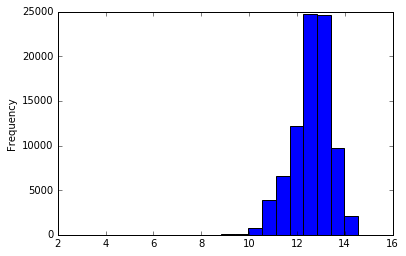

In [18]:
log_x = np.log(df_fixed.taxvaluedollarcnt)
x_plt = log_x.plot.hist(bins=20)
plt.show()

#### Histograms of all variables in dataframe:

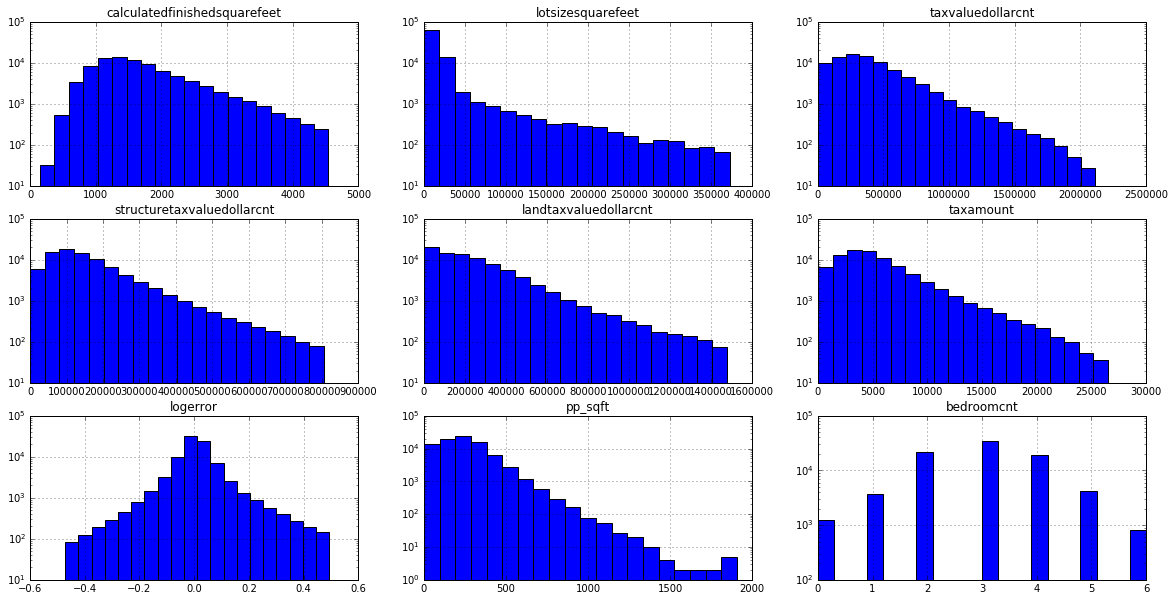

In [19]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount',
      'logerror',
      'pp_sqft',
      'bedroomcnt']):
    plot_number = i + 1
    series = df_fixed[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=True)

#### Boxplots of all variables in dataframe:

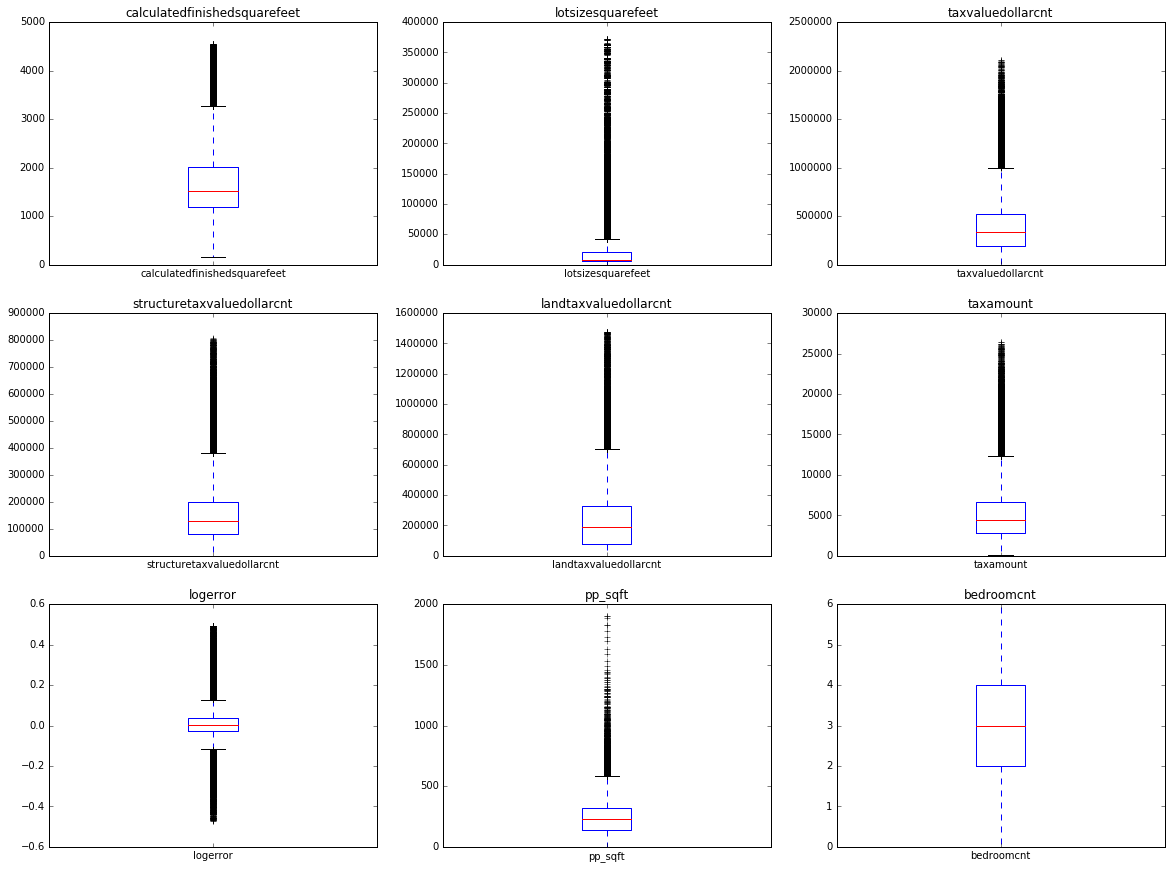

In [69]:
plt.figure(figsize=(20,20))
for i, col in enumerate(['calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount',
      'logerror',
      'pp_sqft',
      'bedroomcnt']):
    plot_number = i + 1
    series = df_fixed[col]
    plt.subplot(4, 3, plot_number)
    plt.title(col)
    series.plot.box() #logy=True

#### Based on these results above, we would normalize the data.  However, that will not be done for this project here.

#### Create a variable, `colnames`, that is a list of the column names. 
Why? You will likely reference this variable later.

In [21]:
columns = pd.DataFrame(df_fixed.columns, columns=['variable_name'])
columns

,variable_name
0,parcelid
1,calculatedfinishedsquarefeet
2,lotsizesquarefeet
3,taxvaluedollarcnt
4,structuretaxvaluedollarcnt
5,landtaxvaluedollarcnt
6,taxamount
7,bedroomcnt
8,pp_sqft
9,logerror


#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [22]:
x_vars = columns
x_vars

,variable_name
0,parcelid
1,calculatedfinishedsquarefeet
2,lotsizesquarefeet
3,taxvaluedollarcnt
4,structuretaxvaluedollarcnt
5,landtaxvaluedollarcnt
6,taxamount
7,bedroomcnt
8,pp_sqft
9,logerror


#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous?

##### Dependent variable is 'logerror'

In [23]:
y = df_fixed.columns.values[7]
y

'bedroomcnt'

##### Dependent variable is continuous.

In [24]:
continuous = df_fixed[['logerror']]
continuous.head()

,logerror
0,0.0953
1,0.0198
2,0.0060
3,-0.0566
4,0.0573


#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

##### I will not be attempting the bonus.

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

#### Split data into training and test datasets

In [25]:
X = df_fixed.drop(['parcelid', 'logerror'], axis=1)
# Can use this immediately below to include only the one x variable I'm testing at each time.
# X = df_fixed[['logerror']]

y = df_fixed[['logerror']]

print(X.head())
print(y.head())

# [
# 'calculatedfinishedsquarefeet',
# 'lotsizesquarefeet',
# 'taxvaluedollarcnt', 
# 'structuretaxvaluedollarcnt',
# 'landtaxvaluedollarcnt',
# 'pp_sqft'
# 'taxamount',

   calculatedfinishedsquarefeet  lotsizesquarefeet  taxvaluedollarcnt  \
0                        1264.0        1735.000000           191811.0   
1                         777.0       29110.164177           239679.0   
2                        1101.0        6569.000000            47853.0   
3                        1554.0        7400.000000            62914.0   
4                        2415.0        6326.000000           554000.0   

   structuretaxvaluedollarcnt  landtaxvaluedollarcnt  taxamount  bedroomcnt  \
0                    115087.0                76724.0    2015.06         3.0   
1                    143809.0                95870.0    2581.30         2.0   
2                     33619.0                14234.0     591.64         3.0   
3                     45609.0                17305.0     682.78         2.0   
4                    277000.0               277000.0    5886.92         4.0   

      pp_sqft  
0  151.749209  
1  308.467181  
2   43.463215  
3   40.485199  
4  229

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'bedroomcnt', 'pp_sqft', 'logerror']
Train dimensions (rows, columns): (67828, 9)


Test columns:  ['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'bedroomcnt', 'pp_sqft', 'logerror']
Test dimensions (rows, columns): (16958, 9)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.80
Test Split: 0.20


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

Test of this plot with a single variable:

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


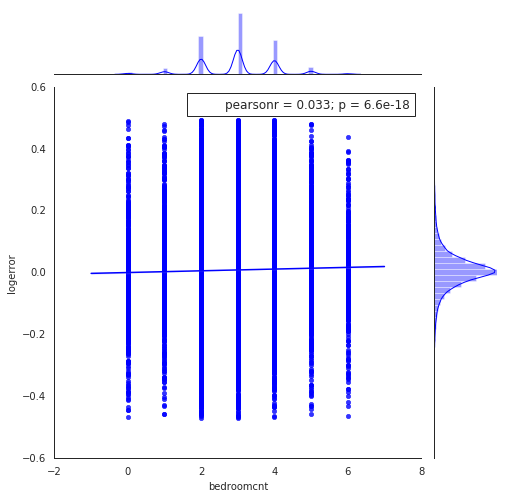

In [28]:
with sns.axes_style('white'):
    j = sns.jointplot('bedroomcnt', 'logerror', data=train, kind='reg', height=7);
    j.annotate(stats.pearsonr)
plt.show()

#### Jointplots:

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

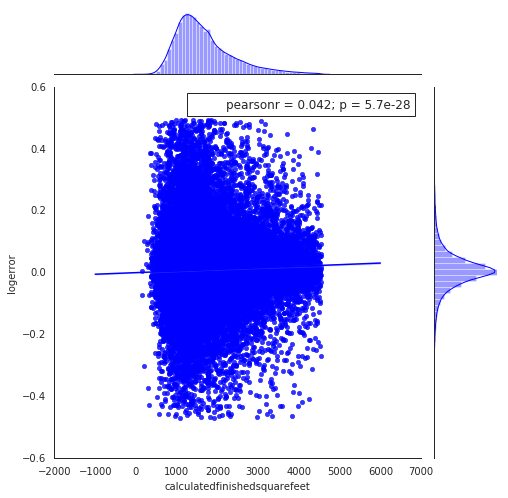

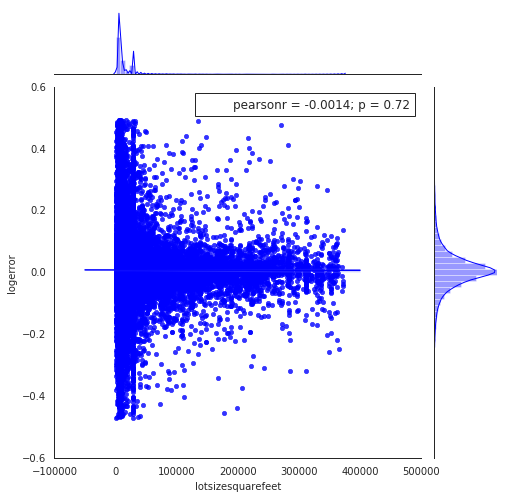

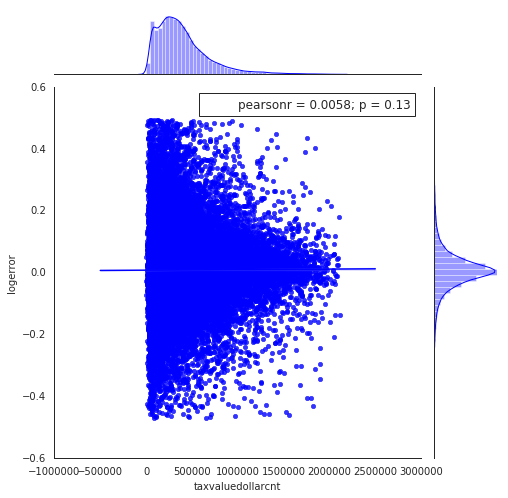

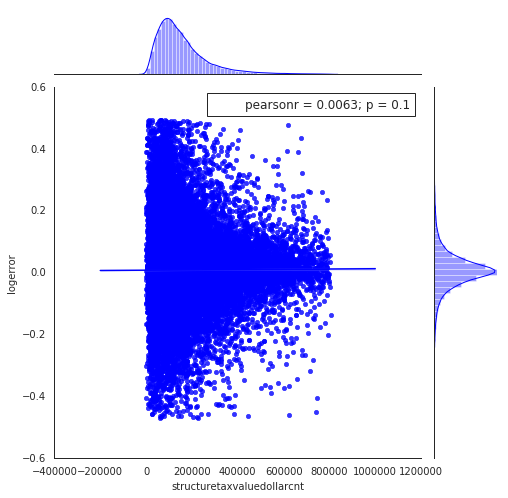

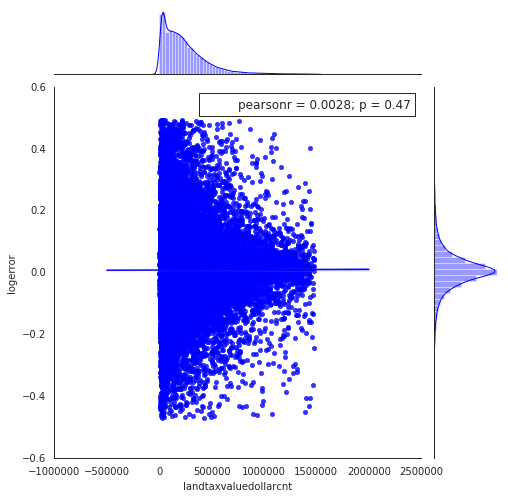

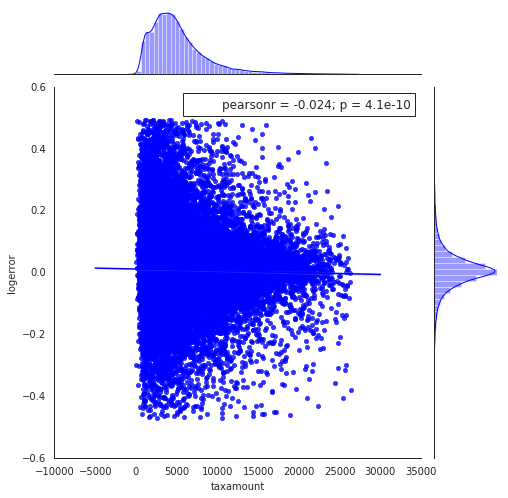

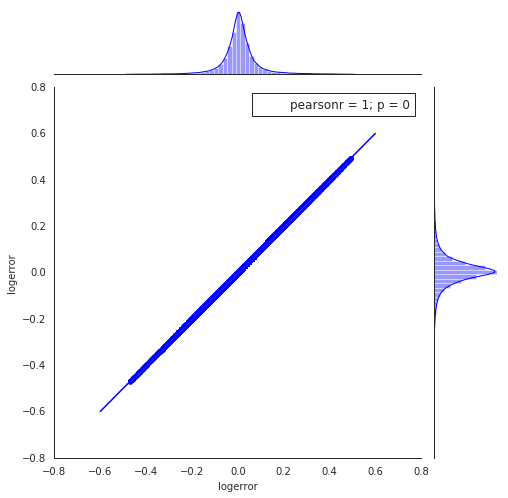

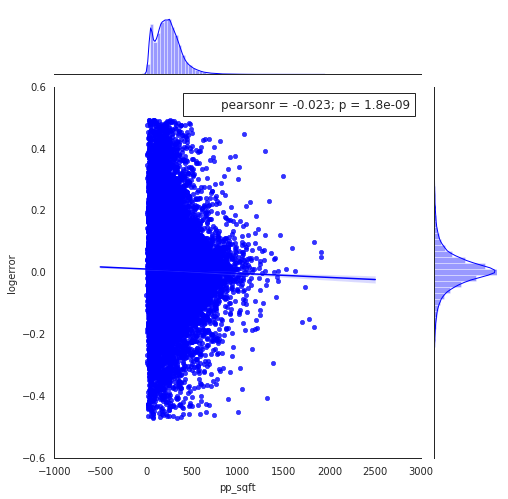

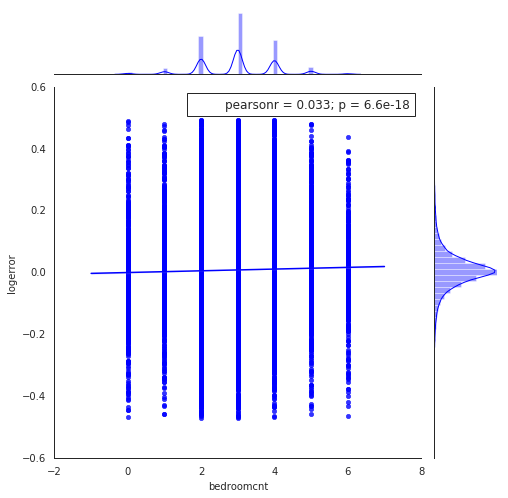

In [29]:
for i, col in enumerate([
'calculatedfinishedsquarefeet',
'lotsizesquarefeet',
'taxvaluedollarcnt',
'structuretaxvaluedollarcnt',
'landtaxvaluedollarcnt',
'taxamount',
'logerror',
'pp_sqft',
'bedroomcnt'
]):
    with sns.axes_style('white'):
            plot_number = i + 1
#             series = df_fixed[col]
            j = sns.jointplot(train[col], 'logerror', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

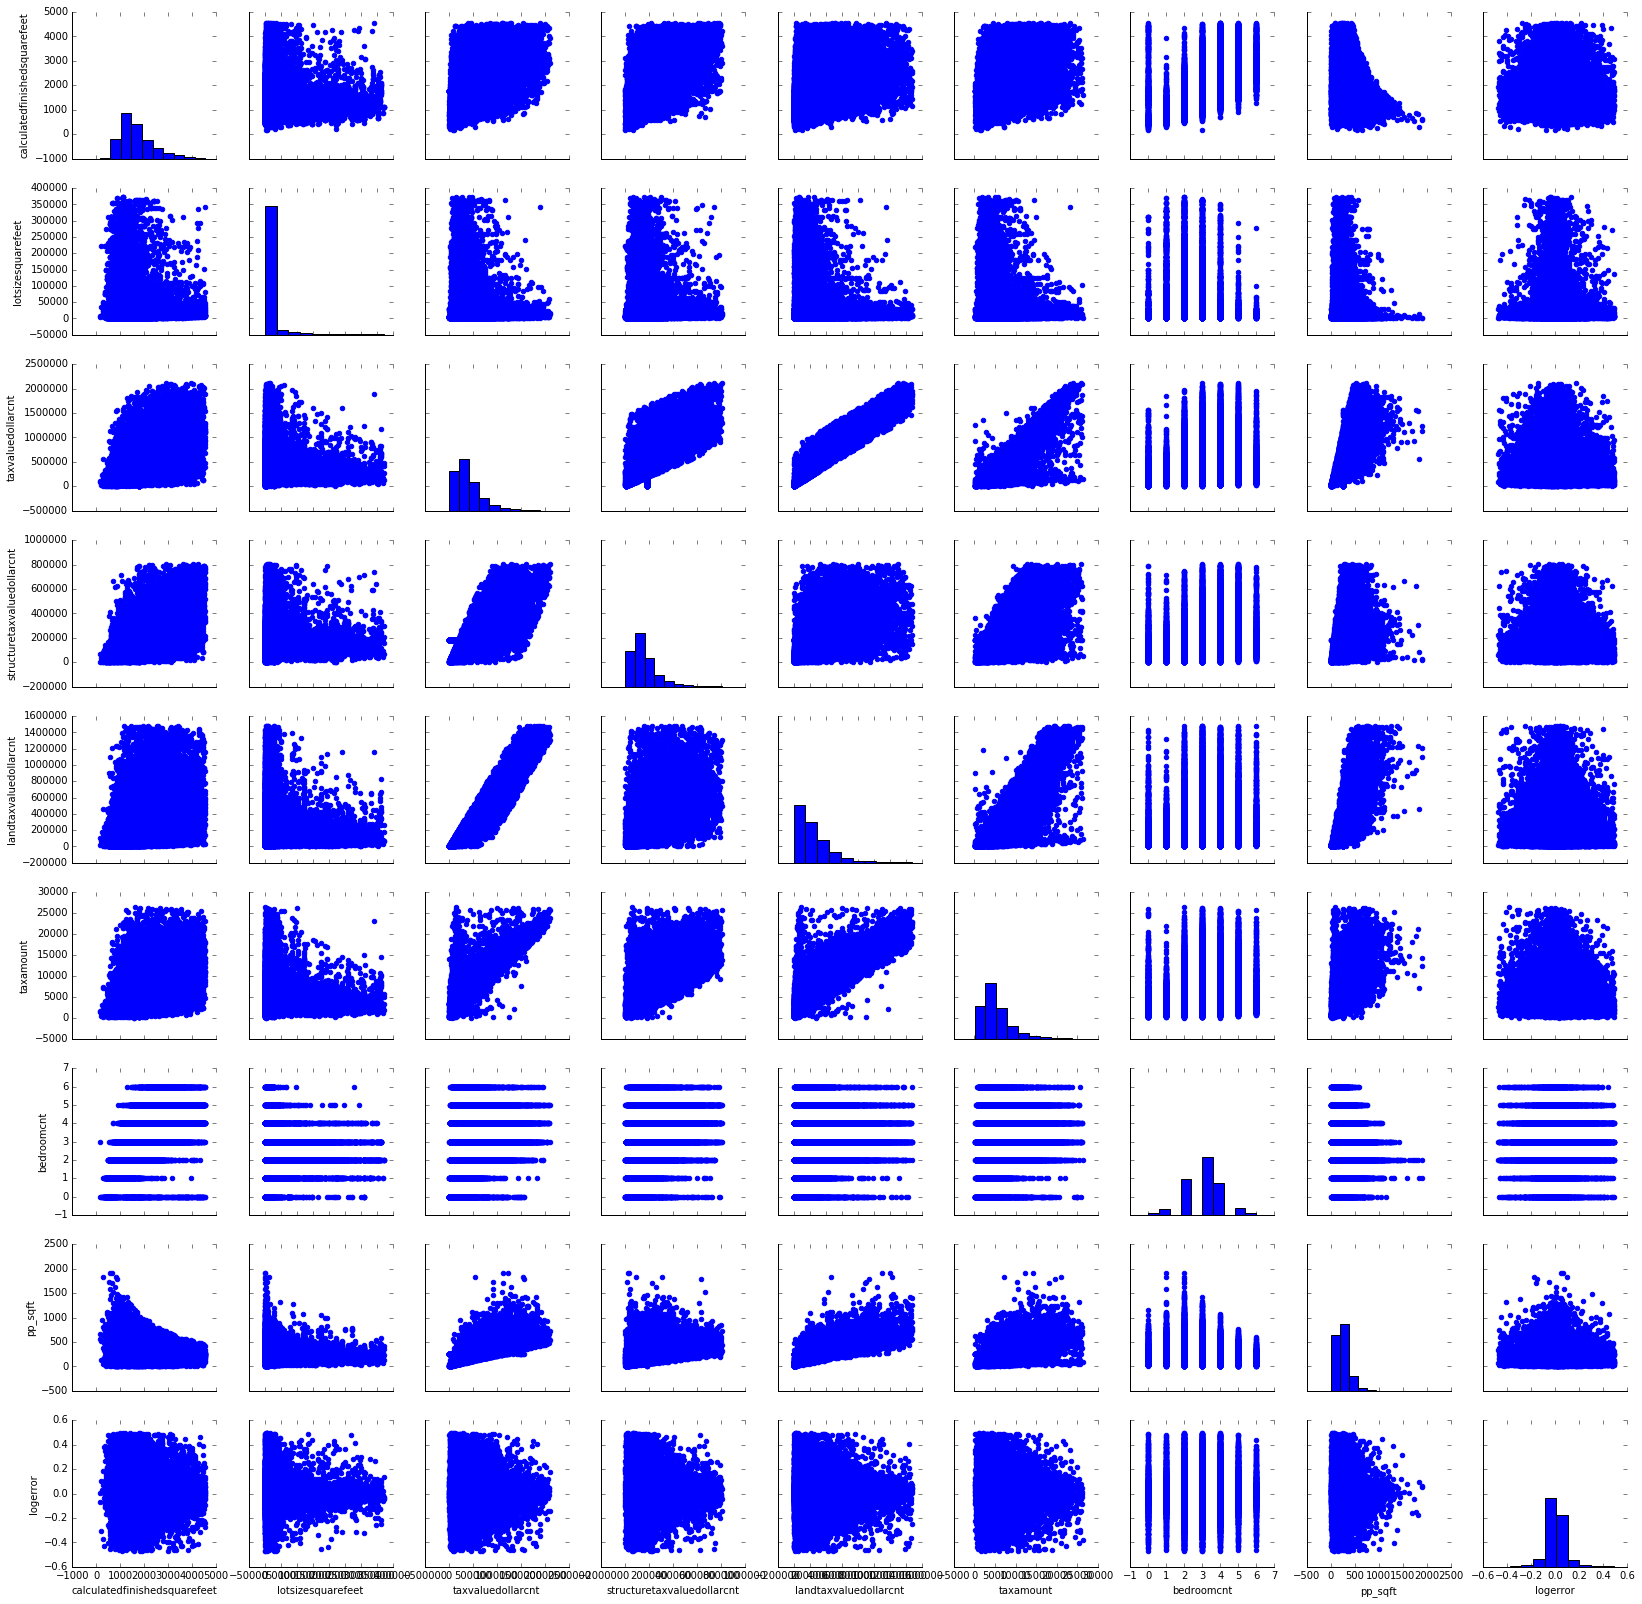

In [30]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#### Create a heatmap of the correlation between each variable pair.

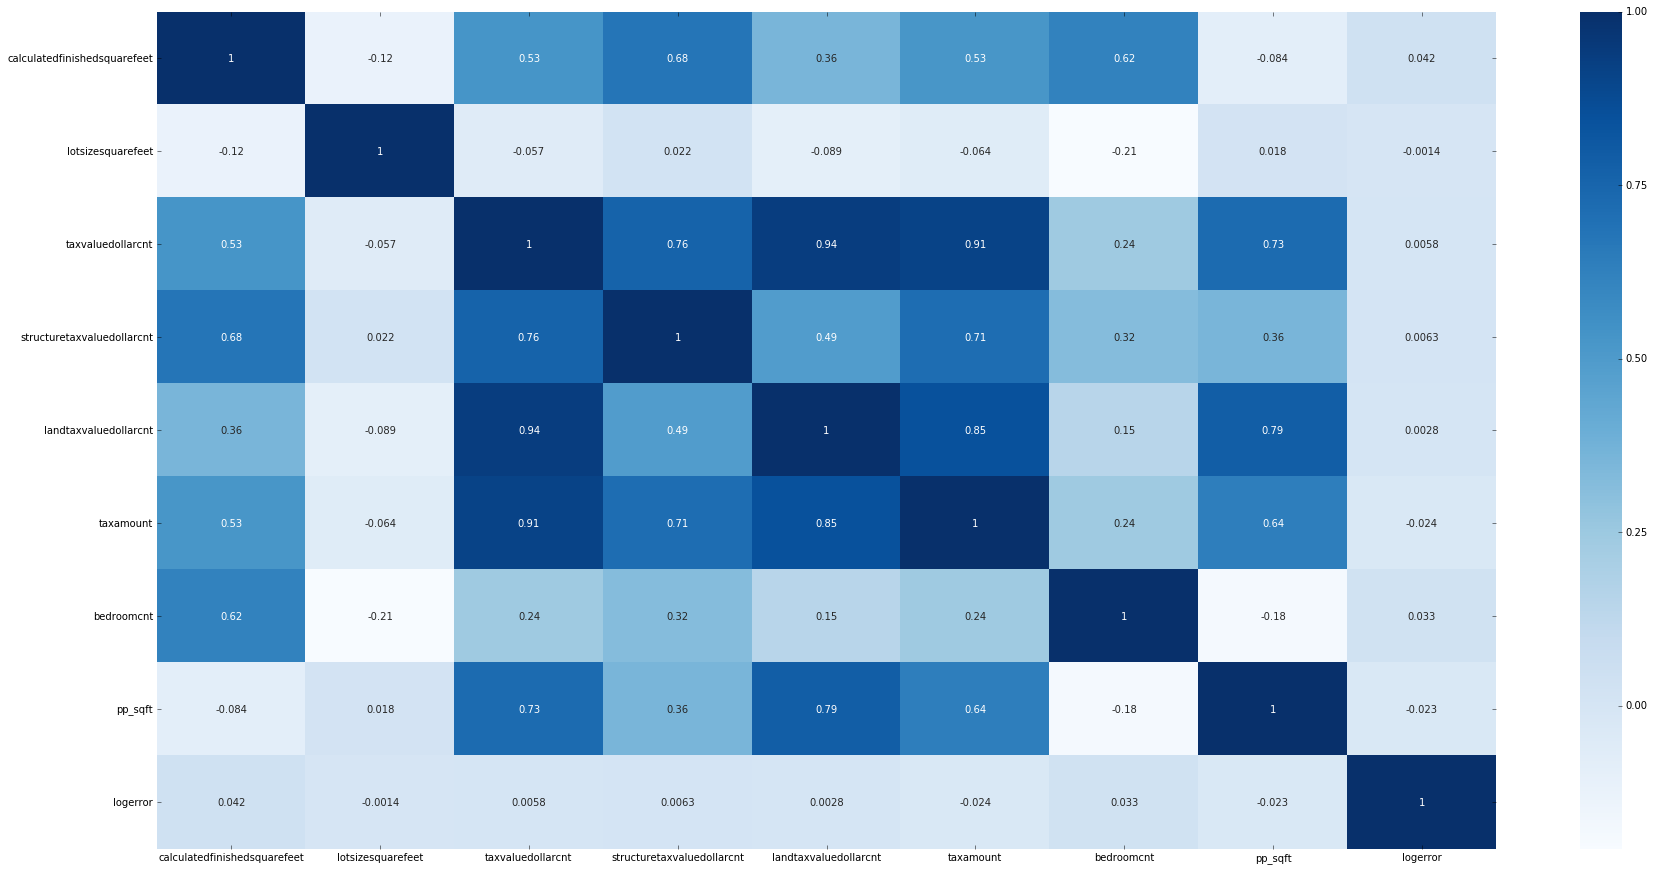

In [31]:
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [32]:
[[column, pearsonr(train[column], train.logerror)] for column in X_train]

[['calculatedfinishedsquarefeet',
  (0.04208223071395512, 5.663093471435904e-28)],
 ['lotsizesquarefeet', (-0.0013788601808881178, 0.7195193331437473)],
 ['taxvaluedollarcnt', (0.0058311995007784105, 0.12885026662647361)],
 ['structuretaxvaluedollarcnt', (0.006270488444561298, 0.10245637697164423)],
 ['landtaxvaluedollarcnt', (0.002753542047374123, 0.4733029056351187)],
 ['taxamount', (-0.024000111303849214, 4.0697618520843927e-10)],
 ['bedroomcnt', (0.03309629221512836, 6.594539136842707e-18)],
 ['pp_sqft', (-0.023081365886005935, 1.8329699071919567e-09)]]

In [33]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'calculatedfinishedsquarefeet': (0.04208223071395512, 5.663093471435904e-28),
 'lotsizesquarefeet': (-0.0013788601808881178, 0.7195193331437473),
 'taxvaluedollarcnt': (0.0058311995007784105, 0.12885026662647361),
 'structuretaxvaluedollarcnt': (0.006270488444561298, 0.10245637697164423),
 'landtaxvaluedollarcnt': (0.002753542047374123, 0.4733029056351187),
 'taxamount': (-0.024000111303849214, 4.0697618520843927e-10),
 'bedroomcnt': (0.03309629221512836, 6.594539136842707e-18),
 'pp_sqft': (-0.023081365886005935, 1.8329699071919567e-09)}

### Summarize your conclusions from all of these steps.  

#### Answering the questions from the Brainstorming section in the planning phase:
The question asks, "What variables correlate to the Zestimate error?"

At this point, it would be appropriate to state that the variables initially considered in the planning phase have shown essentially no correlation to the Zestimate error.

In the planning phase, I had stated that, "Big picture, the error is caused because of a mismatch between the Zestimate and the actual sales price."  I still believe that may be the case.  However, the variables chosen to find this corrlation with the error are simply not proving that point, as they are currently configured (meaning, "without any additional fields included in this analysis and modeling").

It might be possible in another round of research into this problem, to plug in different categorical variables (bedroomcnt, bathroomcnt, zip code, region, etc) and begin to see correlation with the log error.

#### Response to the stated Hypothesis:

In the planning section, I predicted the logerror would be driven by a combination of sales price, square footage and/or taxes, and further, that the correlation among these variables would bear this out.  However, the weak correlations among these variables in relation to the dependent variable of "logerror", simply do not support this prediction.

I accept the null hypothesis that there is no correlation among these variables to the dependent variable, as these independent variables are currently configured.  Further review, adding in other independent variables, and/or normalizing the data might show different results in another round of research.  However, at this point, the null hypothesis stands.  No correlation.

#### Response to how variables might impact or relate to each other:
I had initially stated that square footage and price often play hand in hand in real estate.

Further, I hypothesyzed there would likely be a valuation for the property and also one for the dwelling, and possibly a value that combines the two into an overall valuation or sales price.

I stated that taxes would be correlated to square footage, as taxes are calculated on a square footage basis.

And finally, I stated there may be a need to create an additional feature that calculates price-per-square foot, and that that measure may be relevant to this problem.

In short, most of these ideas were proven in the data.

During some random experimentation in the data exploration phase, I swapped out the dependent variable of logerror for taxvaluedollarcnt (essentially, the sales price).  The first thing I noticed was the very strong correlations between the various dollar value fields, the square footage fields and the taxation fields.

This makes sense as real estate valuations are very often based off of square footage and taxes are based on square footage also.  So there was a very tight correlation among those fields.  Again, as was learned in class, if one field is used to create another, of course they will show strong correlation.  So this experiment was quickly shelved.

It is worth noting, however, even this new configuration did not show correlation between the newly-swapped sales price as the dependent variable and the log error as an independent variable.

To touch back on the predictions from the planning phase, I did create a new variable to calculate price per square foot of the dwelling.  However, it also did not show correlation to the logerror in either of the configurations mentioned above.

Finally, it is worth stating that if we could instead find the most statistically significant drivers of the actual sales price itself (a field this data set does contain), those same drivers could be plugged into the Zestimate, and would not only reduce the error, but would likely eliminate it.  I wonder if this entire problem is searching to solve the wrong problem:  rather than predicting the error, we maybe should be trying to predict the sales price, and then apply that methodology over to the Zestimate, since that's the purpose of the Zestimate.

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [34]:
three_br = train[train.bedroomcnt == 3]
five_br = train[train.bedroomcnt >= 5]

from scipy.stats import ttest_ind
ttest_ind(three_br.logerror, five_br.logerror)

Ttest_indResult(statistic=-6.129824968899367, pvalue=8.901871190681335e-10)

Personal note re R^2:
Need: R^2 greater than .5;  ie in one example, "92.1% of the variance in dependent variable is explained by the independent variable."

Also re Pearson's R:  "Pearson's R is __ with a significance p-value of __"


As a yardstick, REMEMBER:

R square > .5 (or "50%"),

F stat significance < 0.05

p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [35]:
lt_200k = train[train.taxvaluedollarcnt <= 200_000]
gt_200k = train[train.taxvaluedollarcnt > 200_000]

from scipy.stats import ttest_ind
ttest_ind(lt_200k.logerror, gt_200k.logerror)

Ttest_indResult(statistic=0.2953544411395502, pvalue=0.7677240364256773)

In [36]:
lt_200dolls_sqft = train[train.pp_sqft <= 200]
gr_200Dolls_sqft = train[train.pp_sqft > 200]

from scipy.stats import ttest_ind
ttest_ind(lt_200dolls_sqft.logerror, gr_200Dolls_sqft.logerror)

Ttest_indResult(statistic=4.107284128308702, pvalue=4.008075820756575e-05)

In [37]:
avg_am_new_home = train[train.calculatedfinishedsquarefeet == 2679]
gt_avg_am_new_home = train[train.calculatedfinishedsquarefeet > 2679]

from scipy.stats import ttest_ind
ttest_ind(avg_am_new_home.logerror, gt_avg_am_new_home.logerror)

Ttest_indResult(statistic=-1.0879485741362644, pvalue=0.276657085360061)

### Data Modeling

#### Feature Engineering & Selection

#### Are there new features you could create based on existing features that might be helpful? 

Come up with at least one possible new feature that is a calculation from 2+ existing variables. 

##### The decision was made at this stage to create a new variable, 'pp_sqft', to calculate the price per square foot.

The field was added into the dataframe at the data acquistion phase, when the properties and predictions tables were joined.

That code, from earlier in this notebook, is:

df_a['pp_sqft'] = (df_a.taxvaluedollarcnt / df_a.calculatedfinishedsquarefeet)

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

In [38]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     155.4
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          1.03e-260
Time:                        09:11:14   Log-Likelihood:                 69807.
No. Observations:               67828   AIC:                        -1.396e+05
Df Residuals:                   67820   BIC:                        -1.395e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
calculatedfinishedsquarefeet  1.052e-05   8.55e-07     12.300      0.000    8.84e-06    1.22e-05
lotsizesquarefeet             1.494e-08   8.24e-09      1.813      0.070   -1.21e-09    3.11e-08
taxvaluedollarcnt             2.528e-07   2.93e-08      8.621      0.000    1.95e-07     3.1e-07
structuretaxvaluedollarcnt   -2.345e-07      3e-08     -7.808      0.000   -2.93e-07   -1.76e-07
landtaxvaluedollarcnt        -2.053e-07   2.99e-08     -6.877      0.000   -2.64e-07   -1.47e-07
taxamount                     -4.54e-06   2.31e-07    -19.666      0.000   -4.99e-06   -4.09e-06
bedroomcnt                      -0.0002      0.000     -0.500      0.617      -0.001       0.001
pp_sqft                       1.067e-06   3.46e-06      0.309      0.758   -5.71e-06    7.85e-06
==============================================================================
Omnibus:                    11522.816   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124180.223
Skew:                           0.494   Prob(JB):                         0.00
Kurtosis:                       9.555   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)

Several fields required in the project were determined to be categorical in nature and were not providing any visible correlation results.  As such those fields were swapped out for the field shown in df_a in the data acquisition phase.  Those are the fields/features that will be used going forward in this project.

#### Train & Test Model

#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

No changes made, other than the field swaps mentioned in the cell above.

- Identify the best model after all training

-- The best model, while not great, is the 3rd model.  This note added after fitting all models.

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  

#### Fitting the first model:

In [39]:
lm1 = LinearRegression(fit_intercept=True, normalize=False)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [40]:
lm1.fit(X_train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'pp_sqft']], y_train)
print(lm1)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)


# 'calculatedfinishedsquarefeet', # only field in X axis for this test
# 'lotsizesquarefeet',
# 'taxvaluedollarcnt', 
# 'structuretaxvaluedollarcnt',
# 'landtaxvaluedollarcnt',
# 'pp_sqft'
# 'taxamount',

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.00128902]
[[ 5.76630740e-06 -3.31628401e-09 -6.54134770e-06]]


In [41]:
print('Univariate - logerror = b + m1 * calculatedfinishedsquarefeet + m2 * taxvaluedollarcnt + m3 * pp_sqft')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])
print('    coefficient (m3): %.2f' % lm1_coefficients[0][2])
print()

Univariate - logerror = b + m1 * calculatedfinishedsquarefeet + m2 * taxvaluedollarcnt + m3 * pp_sqft
    y-intercept (b): 0.00
    coefficient (m1): 0.00
    coefficient (m2): -0.00
    coefficient (m3): -0.00



In [42]:
# This makes predictions based on the model created above.
y_pred_lm1 = lm1.predict(X_train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'pp_sqft']])

#### Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.  (from sklearn.mean_squared_error and sklearn.r2_score)

##### Mean Squared Error (MSE):

In [43]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print('lm1\n  mse: {:.3}'.format(mse_lm1))

lm1
  mse: 0.00753


##### R-squared values:

In [44]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance of the log error can be explained by the calculatedfinishedsquarefeet, taxvaluedollarcnt, pp_sqft'.format(r2_lm1))

  0.22% of the variance of the log error can be explained by the calculatedfinishedsquarefeet, taxvaluedollarcnt, pp_sqft


Text(0, 0.5, 'Residuals')

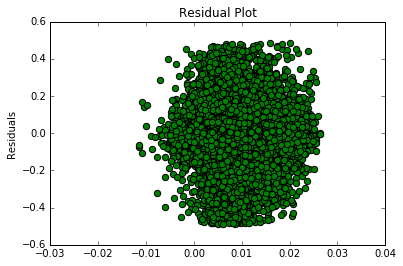

In [45]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

#### Fitting the model a second time

In [46]:
lm2 = LinearRegression(fit_intercept=True, normalize=False)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [47]:
lm2.fit(X_train[['calculatedfinishedsquarefeet', 'pp_sqft']], y_train)
print(lm2)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)


# 'calculatedfinishedsquarefeet', # only field in X axis for this test
# 'lotsizesquarefeet',
# 'taxvaluedollarcnt', 
# 'structuretaxvaluedollarcnt',
# 'landtaxvaluedollarcnt',
# 'pp_sqft'
# 'taxamount',

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.00256131]
[[ 4.95665500e-06 -1.16147558e-05]]


In [48]:
print('Univariate - logerror = b + m1 * calculatedfinishedsquarefeet + m2 * pp_sqft')
print('    y-intercept (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])
print()

Univariate - logerror = b + m1 * calculatedfinishedsquarefeet + m2 * pp_sqft
    y-intercept (b): 0.00
    coefficient (m1): 0.00
    coefficient (m2): -0.00



In [49]:
# This makes predictions based on the model created above.
y_pred_lm2 = lm2.predict(X_train[['calculatedfinishedsquarefeet', 'pp_sqft']])

#### Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.  (from sklearn.mean_squared_error and sklearn.r2_score)

##### Mean Squared Error (MSE):

In [50]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print('lm1\n  mse: {:.3}'.format(mse_lm2))

lm1
  mse: 0.00753


##### R-squared values:

In [51]:
r2_lm1 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance of the log error can be explained by the calculatedfinishedsquarefeet, pp_sqft'.format(r2_lm1))

  0.22% of the variance of the log error can be explained by the calculatedfinishedsquarefeet, pp_sqft


Text(0, 0.5, 'Residuals')

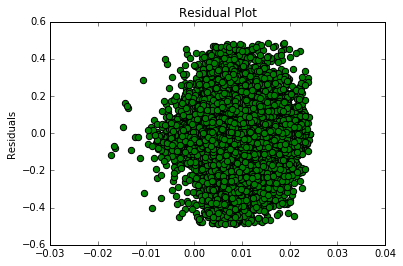

In [70]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_train, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

#### Fitting the model a third time

In [53]:
lm3 = LinearRegression(fit_intercept=True, normalize=False)
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [54]:
lm3.fit(X_train[['calculatedfinishedsquarefeet']], y_train)
print(lm3)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)


# 'calculatedfinishedsquarefeet', # only field in X axis for this test
# 'lotsizesquarefeet',
# 'taxvaluedollarcnt', 
# 'structuretaxvaluedollarcnt',
# 'landtaxvaluedollarcnt',
# 'pp_sqft'
# 'taxamount',

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-0.00058932]
[[5.15843672e-06]]


In [55]:
print('Univariate - logerror = b + m1 * calculatedfinishedsquarefeet')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m1): %.2f' % lm3_coefficients[0])
print()

Univariate - logerror = b + m1 * calculatedfinishedsquarefeet
    y-intercept (b): -0.00
    coefficient (m1): 0.00



In [56]:
# This makes predictions based on the model created above.
y_pred_lm3 = lm3.predict(X_train[['calculatedfinishedsquarefeet']])

#### Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.  (from sklearn.mean_squared_error and sklearn.r2_score)

##### Mean Squared Error (MSE):

In [57]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print('lm1\n  mse: {:.3}'.format(mse_lm3))

lm1
  mse: 0.00753


##### R-squared values:

In [58]:
r2_lm1 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance of the log error can be explained by the calculatedfinishedsquarefeet'.format(r2_lm1))

  0.18% of the variance of the log error can be explained by the calculatedfinishedsquarefeet


Text(0, 0.5, 'Residuals')

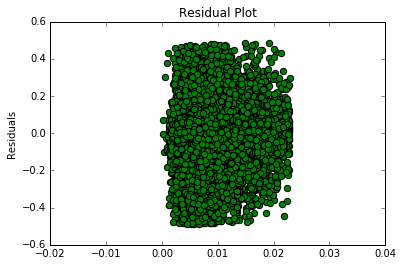

In [59]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_train, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

#### How does the result of the model compare to the other two? Which should you use, based on these results?

Text(0.5, 1.0, 'Predicted vs Actual Log Error')

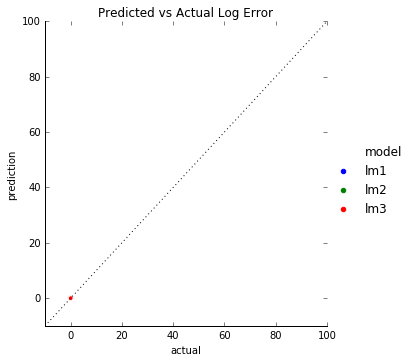

In [60]:
pd.DataFrame({'actual': y_train.logerror,
             'lm1': y_pred_lm1.ravel(),
             'lm2': y_pred_lm2.ravel(),             
             'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([-10, 100],[-10, 100], c='black', ls=':')
plt.ylim(-10, 100)
plt.xlim(-10, 100)
plt.title('Predicted vs Actual Log Error')

##### Based on these results, I'd recommend not using any of these variables and start over with a new hypothesis and new variables.

#### Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [61]:
# This makes predictions based on the model created above.
y_pred_lm3 = lm3.predict(X_test[['calculatedfinishedsquarefeet']])

print('Predicted logerrors associated with y_pred_lm3:\n')
y_pred_lm3

Predicted logerrors associated with y_pred_lm3:



array([[0.00774671],
       [0.00888157],
       [0.00392947],
       ...,
       [0.00874745],
       [0.00954185],
       [0.00734951]])

In [62]:
print(y_pred_lm3.mean())

0.008069409374242843


#### Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.  (from sklearn.mean_squared_error and sklearn.r2_score)

##### Mean Squared Error (MSE):

In [63]:
mse_lm3 = mean_squared_error(y_test, y_pred_lm3)
print('lm1\n  mse: {:.3}'.format(mse_lm3))

lm1
  mse: 0.0078


##### Median Absolute Error (MAE):

In [64]:
from sklearn.metrics import median_absolute_error
mae_lm3 = median_absolute_error(y_test, y_pred_lm3)

print('lm3\n  mae: {:.3}'.format(mae_lm3))

lm3
  mae: 0.0313


##### R-squared values:

In [65]:
r2_lm1 = r2_score(y_test, y_pred_lm3)
print('  {:.2%} of the variance of the log error can be explained by the calculatedfinishedsquarefeet'.format(r2_lm1))

  0.30% of the variance of the log error can be explained by the calculatedfinishedsquarefeet


Text(0, 0.5, 'Residuals')

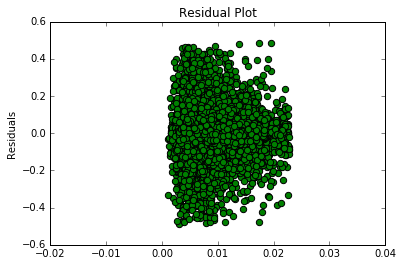

In [66]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_test, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

##### Again, based on these results (but this time from the test data), I'd recommend not using any of these variables and start over with a new hypothesis and new variables.

In [67]:
from sklearn.feature_selection import f_regression

In [68]:
f_regression(X_test[['calculatedfinishedsquarefeet']], y_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([56.3474408]), array([6.37411599e-14]))

'first array'  -  F: array, shape=(n_features,)
This is the: 'F values of features.'

'second array'  -  pval : array, shape=(n_features,)
This is the: 'p-values of F-scores.'